In [ ]:
from google.colab import files
uploaded = files.upload()

### **Importing the required packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import tree

### **Reading and Exploring the Data**

In [ ]:
heart = pd.read_csv('heart.csv')

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart.shape

(303, 14)

In [ ]:
heart.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
#heart['oldpeak'].astype(int)  #to change the datatype of the oldpeak column from float to int

In [ ]:
heart.isnull().sum() #print the total number of missing values column-wise

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
heart.duplicated().sum()

np.int64(1)

In [ ]:
heart[heart.duplicated()] #print the duplicate row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
heart.drop_duplicates(inplace = True) #remove the duplicate row

In [ ]:
#check for the data imbalance
heart['target'].value_counts()

,count
target,
1,164
0,138


### **Machine Learning Process**

In [ ]:
X = heart.drop(columns = 'target')
y = heart['target']

In [ ]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)

#### **Decision Trees Classifier on the data**

In [ ]:
dec_tree = DecisionTreeClassifier(max_depth = 4)
dec_tree.fit(X_train, y_train) #starts the learning process and creates the best tree for the data

DecisionTreeClassifier(max_depth=4)

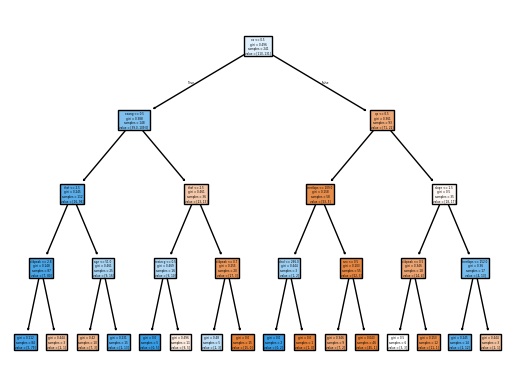

In [ ]:
#plt.figure(figsize = (15, 7))

final_tree = tree.plot_tree(dec_tree, feature_names = X.columns, filled = True)

In [ ]:
dec_tree.get_depth() #printing the total depth of the tree

4

In [ ]:
y_pred = dec_tree.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8032786885245902

### **check for overfitting present in the data**

In [ ]:
y_pred_train = dec_tree.predict(X_train)

In [ ]:
accuracy_score(y_train, y_pred_train)

0.8838174273858921